<a href="https://colab.research.google.com/github/otienocliff/Portfolio/blob/master/Frientier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Covariance matrix
cov_matrix = np.array([
    [0.000452108, 0.000125983, 0.000159048, 0.000186732, 0.000229568],
    [0.000125983, 0.000231861, 5.89952E-05, 0.00016403, 0.000101858],
    [0.000159048, 5.89952E-05, 0.000469096, 6.22798E-05, 0.000275925],
    [0.000186732, 0.00016403, 6.22798E-05, 0.000871942, 0.000141032],
    [0.000229568, 0.000101858, 0.000275925, 0.000141032, 0.000621367]
])

# Number of assets
n = len(cov_matrix)

# Initial weights
init_guess = np.ones(n) / n

# Constraints: weights must sum to 1
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

# Bounds: weights between 0 and 1 (long-only)
bounds = tuple((0, 1) for _ in range(n))

# Objective: minimize portfolio variance
def portfolio_variance(w, cov_matrix):
    return w.T @ cov_matrix @ w

# Solve
opt = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Resulting weights
min_var_weights = opt.x
print("Minimum Variance Portfolio Weights:")
print(f"SBUX:   {min_var_weights[0]:.4f}")
print(f"COSTCO: {min_var_weights[1]:.4f}")
print(f"XOM:    {min_var_weights[2]:.4f}")
print(f"NFLX:   {min_var_weights[3]:.4f}")
print(f"GE:     {min_var_weights[4]:.4f}")

mean_returns = np.array([
    0.006817126,  # SBUX
    0.222350066,  # COSTCO
    0.027953021,  # XOM
    0.129736566,  # NFLX
    0.050507606   # GE
])


Minimum Variance Portfolio Weights:
SBUX:   0.2000
COSTCO: 0.2000
XOM:    0.2000
NFLX:   0.2000
GE:     0.2000


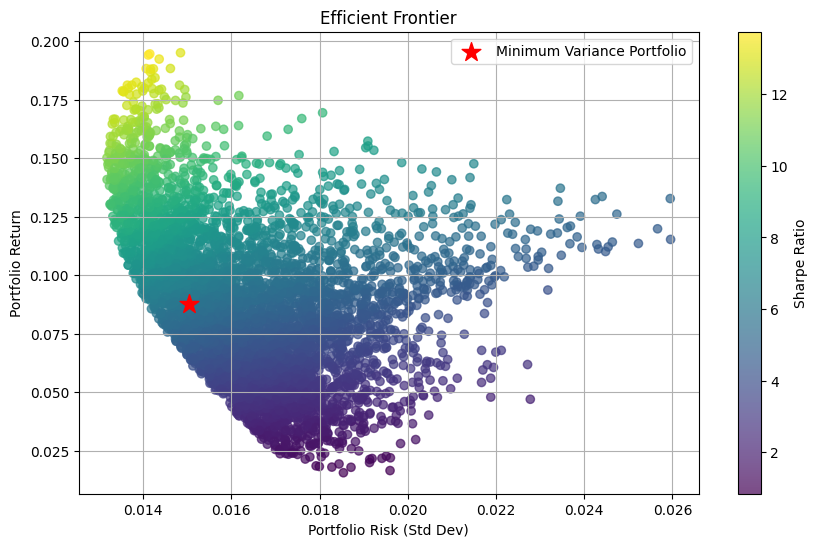

In [ ]:
mean_returns = np.array([
    0.006817126,  # SBUX
    0.222350066,  # COSTCO
    0.027953021,  # XOM
    0.129736566,  # NFLX
    0.050507606   # GE
])
portfolio_returns = []
portfolio_risks = []
weights_record = []

for _ in range(5000):
    weights = np.random.dirichlet(np.ones(n), size=1)[0]
    weights_record.append(weights)
    port_return = np.dot(weights, mean_returns)
    port_std = np.sqrt(weights.T @ cov_matrix @ weights)
    portfolio_returns.append(port_return)
    portfolio_risks.append(port_std)

portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns / portfolio_risks, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Std Dev)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')

# Plot MVP
mvp_return = np.dot(min_var_weights, mean_returns)
mvp_std = np.sqrt(min_var_weights.T @ cov_matrix @ min_var_weights)
plt.scatter(mvp_std, mvp_return, color='red', marker='*', s=200, label='Minimum Variance Portfolio')
plt.legend()
plt.grid(True)
plt.show()
